<a href="https://colab.research.google.com/github/TolqinOrziyev/Toshkent-uy-narxi/blob/main/Toshkent_uy_narx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [1]:
import pandas as pd
import numpy as np
from numpy import int64
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [5]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


In [6]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

***Column 'size'***  

In [8]:
df['size'].unique()
df['size']=df['size'].replace("Площадьземли:1сот",100)

In [9]:
df.dtypes

location      object
district      object
rooms          int64
size          object
level          int64
max_levels     int64
price         object
dtype: object

In [10]:
df['size'].unique()
df['size']=df['size'].astype('float')

In [11]:
df['size']=df['size'].round().astype('int64')

In [12]:
drop_ind=df[(df['size']>500) | (df['size']<20)].index
drop_ind
df.drop(drop_ind, inplace=True)

In [13]:
df.describe()

,rooms,size,level,max_levels
count,6815.000000,6815.000000,6815.000000,6815.000000
mean,2.631988,73.907704,3.719736,6.068232
std,1.070252,37.439870,2.259335,2.626916
min,1.000000,20.000000,1.000000,1.000000
25%,2.000000,50.000000,2.000000,4.000000
50%,3.000000,67.000000,3.000000,5.000000
75%,3.000000,86.000000,5.000000,9.000000
max,10.000000,500.000000,19.000000,25.000000


***Column 'price'***

In [14]:
df[df.price=='Договорная']
df['price'].replace("Договорная", np.NaN, inplace=True)

In [15]:
df.price=df.price.astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [16]:
df.price=df.price.fillna(df.price.mean())

In [17]:
df.price=df.price.round()
df.price=df.price.astype('int64')

In [18]:
ind1=df[(df.price>500000) | (df.price<10000)].index
df.drop(ind1, inplace=True)

In [19]:
df['per_square_price']=np.round(df['price']/df['size']).astype('int64')
df['per_room_size']=np.round(df['size']/df.rooms).round().astype('int64')
df.head()

,location,district,rooms,size,level,max_levels,price,per_square_price,per_room_size
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000,912,19
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000,1077,26
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000,881,21
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500,762,22
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000,786,23


In [20]:
encoder=LabelEncoder()
df.district=encoder.fit_transform(df.district)
df.head()

,location,district,rooms,size,level,max_levels,price,per_square_price,per_room_size
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",8,3,57,4,4,52000,912,19
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",9,2,52,4,5,56000,1077,26
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",6,2,42,4,4,37000,881,21
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",6,3,65,1,4,49500,762,22
4,"город Ташкент, Чиланзарский район, площадь Актепа",6,3,70,3,5,55000,786,23


In [21]:
df.corrwith(df.price).sort_values(ascending=False)

price               1.000000
size                0.783892
per_square_price    0.650103
rooms               0.552777
per_room_size       0.343508
max_levels          0.233540
level               0.065008
district           -0.094043
dtype: float64

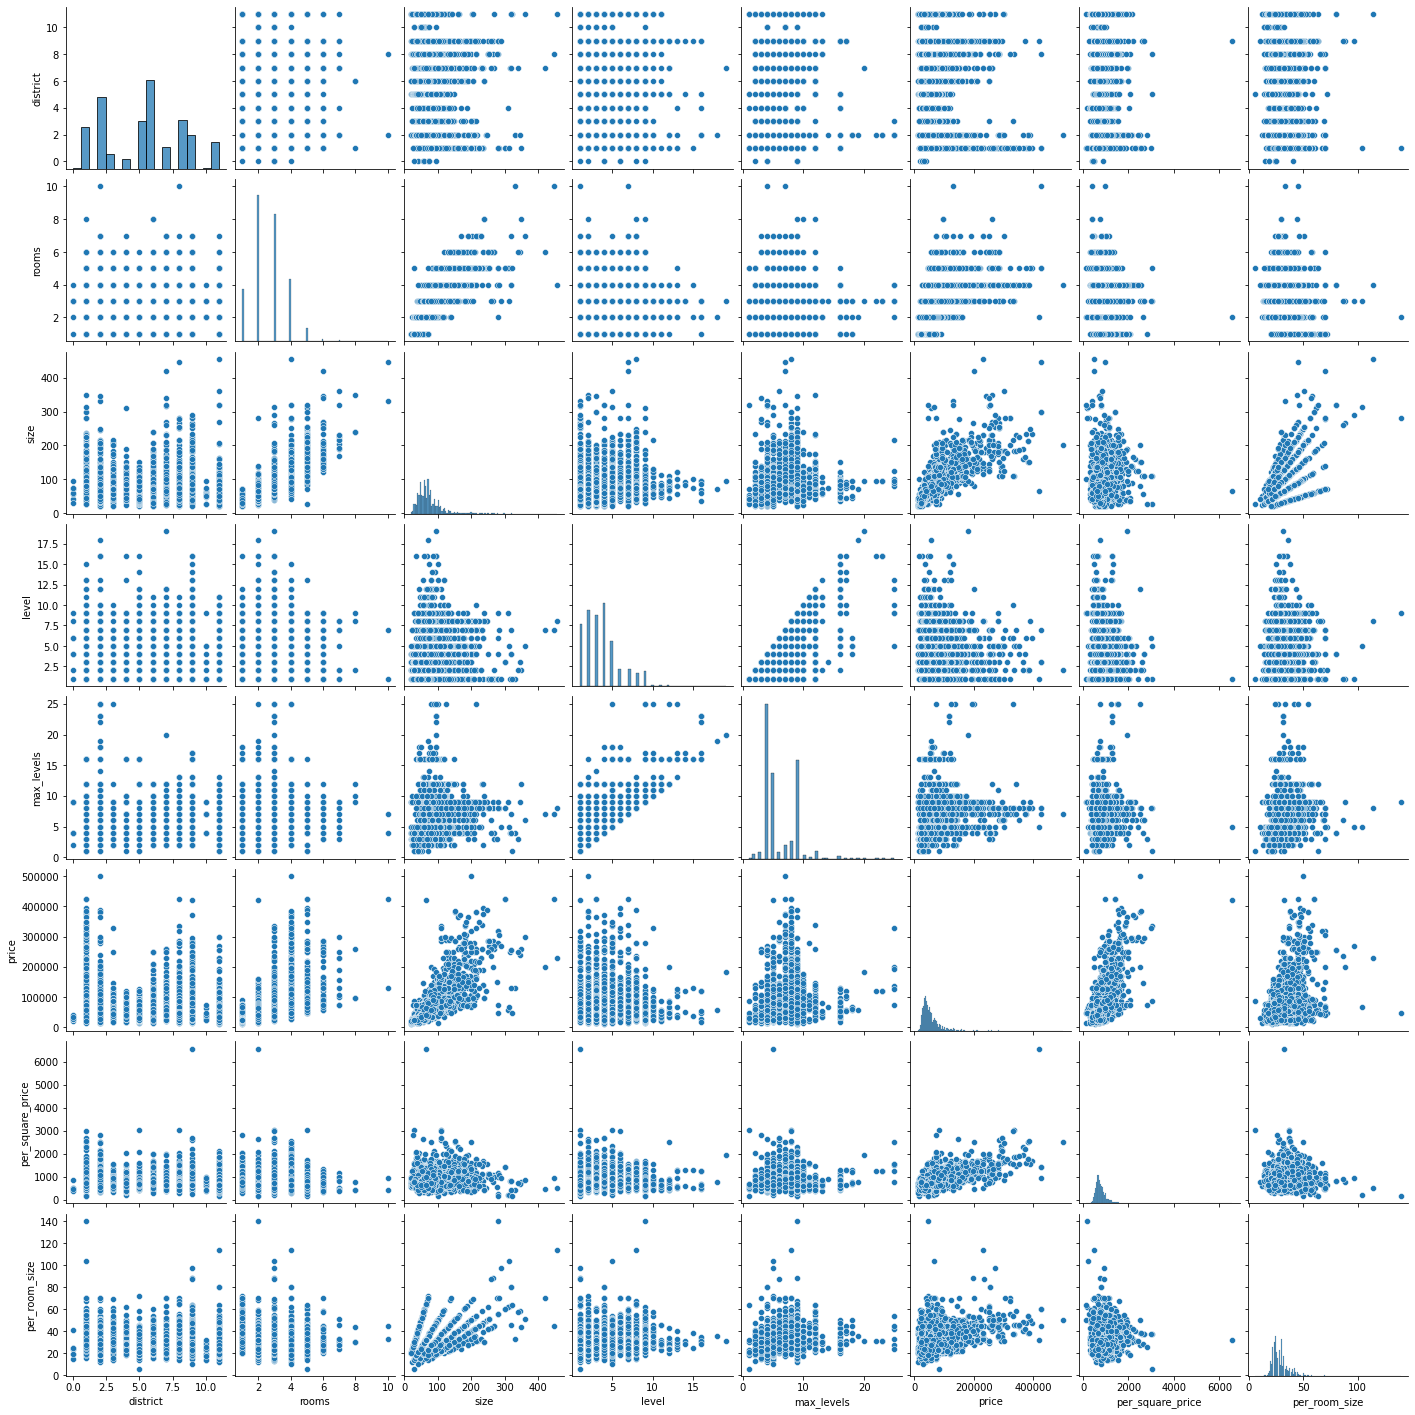

In [22]:
sns.pairplot(df)
plt.show()

**Multiple Linear Regression**

In [23]:
X=df.drop(['location', 'price'], axis=1).values
y=df.price

In [24]:
standart_scaler=StandardScaler()
X=standart_scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=42)
LR_model=LinearRegression()
LR_model.fit(X_train, y_train)

print('Coefficients: ', LR_model.coef_)
print('theta0:', LR_model.intercept_) 

Coefficients:  [-5.42748546e+02 -4.54429708e+03  3.48139252e+04  1.38499496e+02
 -1.47735665e+01  2.35508861e+04 -1.50370656e+03]
theta0: 59283.61314804802


In [26]:
y_predict=LR_model.predict(X_test)

In [27]:
MAE=mean_absolute_error(y_test, y_predict)
MSE=np.sqrt(mean_squared_error(y_test, y_predict))
print(f"MAE:{MAE} \nMSE={MSE}")

MAE:5628.370536451087 
MSE=11597.608380003048


***Multi Linear Regression***

In [28]:
X=df[['size', 'per_square_price']].values
y=df.price

In [29]:
standart_scaler=StandardScaler()
X=standart_scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=42)
MLR_model=LinearRegression()
MLR_model.fit(X_train, y_train)

print('Coefficients: ', MLR_model.coef_)
print('theta0:', MLR_model.intercept_) 

Coefficients:  [30756.81050544 23777.71686034]
theta0: 59283.41698678795


In [31]:
y_predict=MLR_model.predict(X_test)

In [32]:
MAE=mean_absolute_error(y_test, y_predict)
MSE=np.sqrt(mean_squared_error(y_test, y_predict))
print(f"MAE:{MAE} \nMSE={MSE}")

MAE:5911.012937917419 
MSE=11586.577933708824


**Cross validation**

In [33]:
X=df[['size', 'per_square_price']].values
y=df.price.values

In [34]:
X=standart_scaler.fit_transform(X)

In [35]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [36]:
scores=cross_val_score(MLR_model, X, y, scoring="neg_mean_squared_error", cv=10)
MLR_rmse_scores=np.sqrt(-scores)

In [37]:
display_scores(MLR_rmse_scores)

Scores: [ 8212.48310819 10875.96785344 15519.20235457 12364.78048914
 12547.47251953 13617.92516883 17225.64033027 12329.56878856
 11792.58541178  7760.85456784]
Mean: 12224.648059217401
Std.dev: 2756.2407414903137


**Decision Tree**

In [38]:
X=df.drop(['location', 'price'], axis=1).values
y=df.price
X=standart_scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

In [39]:
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [40]:
y_pred=tree_model.predict(X_test)

In [41]:
MAE=mean_absolute_error(y_test, y_pred)
MSE=np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE:{MAE} \nMSE={MSE}")

MAE:1106.9038508707383 
MSE=4510.463260937201


Random Forest

In [42]:
RF_model=RandomForestRegressor()
RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
y_predicted=RF_model.predict(X_test)

In [44]:
MAE=mean_absolute_error(y_test, y_predicted)
MSE=np.sqrt(mean_squared_error(y_test, y_predicted))
print(f"MAE:{MAE} \nMSE={MSE}")

MAE:691.3262950465443 
MSE=3201.303789133254
